In [4]:
from pmdarima.arima import auto_arima
import pandas as pd
import numpy as np
from arch import arch_model
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima import model_selection

import statsmodels.api as sm
import pandas as pd
import numpy as np
import scipy.optimize as spop
from scipy import stats


In [5]:
returnsant=pd.read_csv('returnsant.csv')


In [6]:
returnsant.index=returnsant.perf_date


In [7]:
returnsant=returnsant.drop('perf_date',axis=1)


In [8]:
returnsant=returnsant.drop('Factor - Interest Rates',axis= 1)


In [9]:
returnsant=returnsant.drop('Factor - Value vs Growth',axis=1)


In [ ]:
automodel=auto_arima(returnsant['Hedge Fund'][0:194],returnsant.drop('Hedge Fund',axis=1)[0:194], start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=0, seasonal=False, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
automodel.resid()

In [ ]:
_garch_model = arch_model(automodel.resid()/np.std(automodel.resid()), mean='Zero', p=1, q=1)
garch=( _garch_model.fit(disp = 'off'))

In [ ]:
forecasts = garch.forecast(reindex=False)

In [ ]:
forecasts.residual_variance

In [ ]:
garch.params.values

In [ ]:

def slidingwindow(windowsize):
    params=[]
    rresid=[]
    auto=[]
    _garch_result=[]
    for i in range(0,4):
        auto.append(auto_arima(returnsant['Hedge Fund'][i*windowsize:windowsize+i*windowsize],returnsant.drop('Hedge Fund',axis=1)[i*windowsize:windowsize+i*windowsize], start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=4, seasonal=False, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30))
        _garch_model = arch_model(auto[i].resid()/np.std(auto[i].resid()), mean='Zero', p=1, q=1)
        _garch_result.append( _garch_model.fit(disp = 'off'))
        
        
        
    
        #armapredicts=np.zeros(n_iterations)
        #var=np.zeros(n_iterations)
        #res=np.zeros(n_iterations)
        #res[0]=auto[0].resid()[-1]
    # inital condition
        #var[0]=np.sqrt(252*40)*np.std(auto[0].resid()[:])
    return auto, _garch_result


def armagarch(auto_,auto_garch,n_iterations=18):
    automodel=auto_arima(returnsant['Hedge Fund'][0:194],returnsant.drop('Hedge Fund',axis=1)[0:194], start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=0, seasonal=False, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)
    cv = model_selection.SlidingWindowForecastCV(window_size=12, step=4, h=4)
    predictions = model_selection.cross_val_predict(
    automodel, returnsant['Hedge Fund'][0:194], cv=cv, verbose=2, averaging="median")
    print(len(predictions))
    armapredicts=np.zeros(n_iterations)
    armapredicts[0] = predictions[0]
    var=np.zeros(n_iterations)
    res=np.zeros(n_iterations)
    res[0]= abs(automodel.resid()[160])
    var[0] = abs(automodel.resid()[160]) * np.sqrt(252*13)
    for i in range(1,n_iterations):
        noise = np.random.normal(0,1,1)
            #omega,alpha, beta = [7.77882999e-02, 3.45400567e-14, 9.13521866e-01]
        omega, alpha, beta = garch.params.values
        var[i]=np.sqrt(alpha * (res[i-1])**2 + beta*(var[i-1]) + omega)
        armapredicts[i]= predictions[159+i] +noise *var[i-1]
        res[i]=abs(returnsant['Hedge Fund'][159 +i] - armapredicts[i])
       # for i in range(1,194):
    return armapredicts
       #   
        
        #print(var[i])
        #print(returnsant.iloc[159+i,1:18].values.reshape(-1,1).T.shape)
        #print(params[0:17].values.reshape(-1,1).shape)
     #       armapredicts[i]= params[18]*res[i-1]+returnsant.iloc[i,1:18].values.reshape(-1,1).T.dot(params[0:17].values.reshape(-1,1)) + var[i-i]*noise
        #print(armapredicts[i])
    #        
        #print(res[i])
   # return armapredicts

In [ ]:

plt.plot(np.arange(0,20),returnsant['Hedge Fund'][160:180],c='r')
plt.plot(armagarch(auto, autogarch)/10,c='b')

In [ ]:
auto[3].predict(1,returnsant.drop('Hedge Fund',axis=1)[159:160])

In [ ]:
auto, autogarch= slidingwindow(40)

In [ ]:
autogarch[3].params.values

In [ ]:
auto[1].resid()

In [ ]:
auto_arima(returnsant['Hedge Fund'][0:40],returnsant.drop('Hedge Fund',axis=1)[0:40], start_p=1, start_q=1, max_p=8, max_q=8, start_P=0, start_Q=0, max_P=8, max_Q=8, m=4, seasonal=False, trace=True, d=1, D=1, error_action='warn', suppress_warnings=True, random_state = 20, n_fits=30)

In [ ]:
am = arch_model(returnsant['Hedge Fund'], vol="Garch", p=1, o=1, q=1, dist="Normal")
index = returnsant.index
start_loc = 0
end_loc = np.where(index >= "2020-03-31")[0].min()
forecasts = {}
for i in range(20):

    res = am.fit(first_obs=i, last_obs=i + end_loc, disp="off")
    temp = res.forecast(horizon=1, reindex=False).variance
    fcast = temp.iloc[0]
    forecasts[fcast.name] = fcast

In [ ]:
returnsant.index


In [ ]:
res.params

In [ ]:
forecasts

In [ ]:
stuff= []
for i in range(0,190):
    stuff=([ [returnsant['Hedge Fund'][i-f+4]] for f in range(0,0)])
    print(stuff)

In [ ]:
returnsant['Hedge Fund'][0:10]

In [94]:
class ARMA():
    def __init__(self,trainendog, exog,p,q,I):
        self.endog=trainendog
        self.exog=exog
        self.p=p
        self.q=q
        self.I=I
        self.res=(trainendog-np.mean(trainendog))
        self.x0=np.zeros(self.p+self.q+self.exog.shape[1]+1)
        if I > 0:
            for r in range(0,I):
                self.endog=self.endog.diff()
    
    def acfandpacf(self):
        sm.tsa.graphics.plot_acf( self.endog,title='ACF of endogenous')
        sm.tsa.graphics.plot_pacf( self.endog,title='PACF of endogenous')
    
    @staticmethod
    def _mse(parms,endog,exog,p,q):
        arparams,maparams,exogparams,bias = parms[0:p],parms[p:p+q],parms[p+q:p+q+exog.shape[1]],parms[p+q+exog.shape[1]:]
        armapredicts=np.zeros(endog.shape[0])
        res=np.zeros(endog.shape[0])
        res[0:q]=endog[0:q]-np.mean(endog)
        armapredicts[0:p]= endog[0:p]
        
        
        if p==0:  
            for i in range(1,endog.shape[0]-q):
                armapredicts[i] = np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams) + exog.iloc[i,:].T.dot(exogparams) + bias
                #res[i+q]=abs(armapredicts[i]-endog[i])
        if q==0:  
            for i in range(1,endog.shape[0]-p):
                armapredicts[i] =  np.array([ [armapredicts[i-f+p]] for f in range(0,p)]).T.dot(arparams)  + exog.iloc[i,:].T.dot(exogparams) + bias
                #res[i+q]=abs(armapredicts[i]-endog[i])
        else:
            if p > q:
                for i in range(1,endog.shape[0]-p):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+p]] for f in range(0,p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias 
                    #res[i+q]=abs(armapredicts[i]-endog[i])
            if q > p:
                for i in range(1,endog.shape[0]-q):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+p]] for f in range(0,p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias 
                    #res[i+q]=abs(armapredicts[i]-endog[i])
            else:
                for i in range(1,endog.shape[0]-q):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+p]] for f in range(0,p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias
                    #res[i+q]=abs(armapredicts[i]-endog[i])
        mse=(endog-armapredicts)**2
        summse=np.sum(mse)
        
        return summse
    
    
    def fit_predict(self,endogtest,exogtest,optimizer,n_iterations):
        exog=exogtest
        opti = spop.minimize(self._mse,self.x0,args=(self.endog,self.exog,self.p,self.q), method=optimizer)
        parms=opti.x
        mse=self._mse(parms,self.endog,self.exog,self.p,self.q)
        if exog.shape[1] != self.exog.shape[1]:
            print('ERROR: Exogenous testing has {} columns, while the training exogenous data set has {} columns '.format(exog.shape[1],self.exog.shape[1]))
        if self.I > 0:
            for r in range(0,self.I):
                endogtest=endogtest.diff()
        
        arparams,maparams,exogparams,bias = parms[0:self.p],parms[self.p:self.p+self.q],parms[self.p+self.q:self.p+self.q+self.exog.shape[1]],parms[self.p+self.q+self.exog.shape[1]:]
        armapredicts=np.zeros(n_iterations)
        armapredicts[0:self.p]=self.endog[self.endog.shape[0]-self.p: self.endog.shape[0]]
        res=np.zeros(n_iterations)
        res[0:self.q]=self.res[len(self.res)-self.q: len(self.res)]
        if self.p==0:  
            for i in range(1,n_iterations-self.q):
                armapredicts[i] = np.array([[res[i-f+self.q]] for f in range(0,self.q)]).T.dot(maparams) + self.exog.iloc[i,:].T.dot(exogparams) + bias
                res[i+self.q]= abs(armapredicts[i] - endogtest[i])
        if self.q==0:  
            for i in range(1,n_iterations-self.p):
                armapredicts[i] =  np.array([ [armapredicts[i-f+self.p]] for f in range(0,self.p)]).T.dot(arparams)  + self.exog.iloc[i,:].T.dot(exogparams) + bias
                res[i+self.q]= abs(armapredicts[i] - endogtest[i])
        else:
            if self.p > self.q:
                for i in range(1,n_iterations-self.p):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+self.p]] for f in range(0,self.p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.q]] for f in range(0,self.q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias 
                    res[i+self.q]= abs(armapredicts[i] - endogtest[i])
            if self.q > self.p:
                for i in range(1,n_iterations-self.q):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+self.p]] for f in range(0,self.p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.q]] for f in range(0,self.q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias 
                    res[i+self.q]= abs(armapredicts[i] - endogtest[i])
            else:
                for i in range(1,n_iterations-self.q):
                    armapredicts[i+self.q] =  np.array([ [armapredicts[i-f+self.p]] for f in range(0,self.p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.q]] for f in range(0,self.q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias
                    res[i+self.q]= abs(armapredicts[i] - endogtest[i])
        alpha=0.05
        Tstat= stats.t.ppf(1-alpha, self.endog.shape[0])
        predictionerror=np.sqrt(mse)*Tstat*np.sqrt(1+(1/self.endog.shape[0])+(armapredicts-np.mean(armapredicts))**2/(np.std(armapredicts)))
        predint=[armapredicts - predictionerror, armapredicts + predictionerror]
        return armapredicts,predint
    
    
    def stepwise_search(self,maxp,maxq,optimizer):
        mse=[]
        i=0
        for p in range(1,maxp-1):
            
            for q in range(1,maxq-1):
                self.x0=np.zeros(p+q+self.exog.shape[1]+1)
                opti = spop.minimize(self._mse,self.x0,args=(self.endog,self.exog,p,q), method=optimizer)
                parmso=opti.x
                mse.append(self._mse(parmso,self.endog,self.exog,p,q))
                print("the mse is {} @ p={} and q={}".format(mse[i],p,q))
                i+=1
        print(mse)
    
    def ADFtest(self):
        opti = spop.minimize(self._mse,self.x0,args=(self.endog,self.exog,self.p,self.q), method=optimizer)
        parms=opti.x
        mse=self._mse(parms,self.endog,self.exog,self.p,self.q)
        coef=parms[0]
        var=(np.std(self.endog))
        coeferror= np.sqrt( (mse)/(var*(self.endog.shape[0]-len(self.x0))))
        ADFstat=var/coeferror
        if ADFstat < -2.9:
            print('Unit root null hypothesis rejetced')
        
            


## Check Point 
- Implementing Trend and Seasonal Components
- Sloppy mess but the idea is there 
- Remove the cyclical and trend component of r_t of train and test data, then fit_predict 

In [26]:
class myARMA():
    def __init__(self,trainendog, exog,p,q,I,sp,sq,m):
        self.endog=trainendog
        self.exog=exog
        self.p=p
        self.q=q
        self.I=I
        self.sp=sp
        self.sq=sq
        self.m=m
        self.res=(trainendog-np.mean(trainendog))
        self.x0=np.zeros(self.p+self.q+self.exog.shape[1]+1)
        self.ox0=np.zeros(self.sp+self.sq+2)
        if I > 0:
            for r in range(0,I):
                self.endog=self.endog.diff()
    
    def acfandpacf(self):
        sm.tsa.graphics.plot_acf( self.endog,title='ACF of endogenous')
        sm.tsa.graphics.plot_pacf( self.endog,title='PACF of endogenous')
    
    @staticmethod
    def _seasonaltrendmse(parms,endog,exog,sp,sq,m):
        arparams,maparams,alpha,bias = parms[0:sp],parms[sp:sp+sq],parms[sp+sq:sp+sq+1],parms[sp+sq+1:]
        armapredicts=np.zeros(endog.shape[0])
        res=np.zeros(endog.shape[0])
        res[0:sq]=endog[0:sq]-np.mean(endog)
        armapredicts[0:sp]= endog[0:sp]
       
        
        if sp==0:  
            t=np.arange(1,endog.shape[0]-m)
            for i in range(1,endog.shape[0]-m-sq):
               
                armapredicts[i] = np.array([[res[i-f+sq+m]-res[i-f+sq]] for f in range(0,sq)]).T.dot(maparams)  +t[i]*alpha + bias
                #res[i+q]=abs(armapredicts[i]-endog[i])
        if sq==0: 
            t=np.arange(1,endog.shape[0]-m)
            for i in range(1,endog.shape[0]-m-sp):
                armapredicts[i] =  np.array([ [armapredicts[i-f+sp+m]- armapredicts[i-f+sp]] for f in range(0,p)]).T.dot(arparams) +t[i]*alpha + bias
                #res[i+q]=abs(armapredicts[i]-endog[i])
        else:
            if sp > sq:
                t=np.arange(1,endog.shape[0]-m)
                for i in range(1,endog.shape[0]-m-sp):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+m+sp]-armapredicts[i-f+sp]] for f in range(0,sp)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+m+sq]-res[i-f+sq]] for f in range(0,sq)]).T.dot(maparams.reshape(-1,1)) + t[i]*alpha + bias 
                    #res[i+q]=abs(armapredicts[i]-endog[i])
            if sq > sp:
                t=np.arange(1,endog.shape[0]-m)
                for i in range(1,endog.shape[0]-m-sq):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+m+sp]-armapredicts[i-f+sp]] for f in range(0,sp)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+m+sq]-res[i-f+sq]] for f in range(0,sq)]).T.dot(maparams.reshape(-1,1))  + t[i]*alpha + bias 
                    #res[i+q]=abs(armapredicts[i]-endog[i])
            else:
                t=np.arange(0,endog.shape[0]-m)
                for i in range(1,endog.shape[0]-m-sq):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+m+sp]-armapredicts[i-f+sp]] for f in range(0,sp)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+m+sq]-res[i-f+sq]] for f in range(0,sq)]).T.dot(maparams.reshape(-1,1))  +  t[i]*alpha +bias
                    #res[i+q]=abs(armapredicts[i]-endog[i])
        mse=(endog-armapredicts)**2
        summse=np.sum(mse)
        return summse
        
    def updateendog(self,optimizer):
        opti = spop.minimize(self._seasonaltrendmse,self.ox0,args=(self.endog,self.exog,self.sp,self.sq, self.m), method=optimizer)
        parms=opti.x 
        arparams,maparams,alpha,bias = parms[0:self.sp],parms[self.sp:self.sp+self.sq],parms[self.sp+self.sq:self.sp+self.sq+1],parms[self.sp+self.sq+1:]
        armapredicts=np.zeros(self.endog.shape[0])
        res=np.zeros(self.endog.shape[0])
        res[0:self.sq]=self.endog[0:self.sq]-np.mean(self.endog)
        armapredicts[0:self.sp]= self.endog[0:self.sp]
       
        
        if self.sp==0:  
            t=np.arange(0,self.endog.shape[0]-self.m-self.sq)
            for i in range(1,self.endog.shape[0]-self.m):
               
                armapredicts[i] = np.array([[res[i-f+self.m+self.sq]-res[i-f+self.sq]] for f in range(0,self.sq)]).T.dot(maparams)  +t[i]*alpha + bias
                #res[i+q]=abs(armapredicts[i]-endog[i])
        if self.sq==0: 
            t=np.arange(0,self.endog.shape[0]-self.m-self.sp)
            for i in range(1,self.endog.shape[0]-self.m):
                armapredicts[i] =  np.array([ [armapredicts[i-f+self.m+self.sp] -armapredicts[i-f+self.sp]] for f in range(0,self.sp)]).T.dot(arparams)  +t[i]*alpha + bias
                #res[i+q]=abs(armapredicts[i]-endog[i])
        else:
            if self.sp > self.sq:
                t=np.arange(0,self.endog.shape[0]-self.m-self.sp)
                for i in range(1,self.endog.shape[0]-self.m):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+self.m+self.sp]-armapredicts[i-f+self.sq]] for f in range(0,self.sp)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.m+self.sq]-res[i-f+self.sq]] for f in range(0,self.sq)]).T.dot(maparams.reshape(-1,1)) + t[i]*alpha + bias 
                    #res[i+q]=abs(armapredicts[i]-endog[i])
            if self.sq > self.sp:
                t=np.arange(0,self.endog.shape[0]-self.m-self.sq)
                for i in range(1,self.endog.shape[0]-self.m):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+self.m+self.sp]-armapredicts[i-f+self.sp]] for f in range(0,self.sp)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.m+self.sq]-res[i-f+self.sq]] for f in range(0,self.sq)]).T.dot(maparams.reshape(-1,1))  + t[i]*alpha + bias 
                    #res[i+q]=abs(armapredicts[i]-endog[i])
            else:
                t=np.arange(0,self.endog.shape[0]-self.m)
                for i in range(1,self.endog.shape[0]-self.m-self.sq):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+self.m+self.sp]-armapredicts[i-f+self.sp]] for f in range(0,self.sp)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.m+self.sq]-res[i-f+self.sq]] for f in range(0,self.sq)]).T.dot(maparams.reshape(-1,1))  +  t[i]*alpha +bias
                    #res[i+q]=abs(armapredicts[i]-endog[i])
        self.endog=self.endog - armapredicts
        return parms
        
    def updateendogtest(self,endogtest,parms):
        arparams,maparams,alpha,bias = parms[0:self.sp],parms[self.sp:self.sp+self.sq],parms[self.sp+self.sq:self.sp+self.sq+1],parms[self.sp+self.sq+1:]
        armapredicts=np.zeros(endogtest.shape[0])
        res=np.zeros(endogtest.shape[0])
        res[0:self.sq]=endogtest[0:self.sq]-np.mean(endogtest)
        armapredicts[0:self.sp]= endogtest[0:self.sp]
        
        
        if self.sp==0:  
            t=np.arange(1,endogtest.shape[0]-self.m)
            for i in range(1,endogtest.shape[0]-self.sq-self.m):
               
                armapredicts[i] = np.array([[res[i-f+self.sq+self.m]-res[i-f+self.sq]] for f in range(0,self.sq)]).T.dot(maparams)  +t[i]*alpha + bias
                #res[i+q]=abs(armapredicts[i]-endog[i])
        if self.sq==0: 
            t=np.arange(1,endogtest.shape[0]-self.m)
            for i in range(1,endogtest.shape[0]-self.sp-self.m):
                armapredicts[i] =  np.array([ [armapredicts[i-f+self.sp+self.m]-armapredicts[i-f+self.sp]] for f in range(0,self.sp)]).T.dot(arparams)  +t[i]*alpha + bias
                #res[i+q]=abs(armapredicts[i]-endog[i])
        else:
            if self.sp > self.sq:
                t=np.arange(1,endogtest.shape[0]-self.m)
                for i in range(1,endogtest.shape[0]-self.sp-self.m):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+self.sp+self.m]-armapredicts[i-f+self.sp]] for f in range(0,self.sp)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.sq+self.m]-res[i-f+self.sq]] for f in range(0,self.sq)]).T.dot(maparams.reshape(-1,1)) + t[i]*alpha + bias 
                    #res[i+q]=abs(armapredicts[i]-endog[i])
            if self.sq > self.sp:
                t=np.arange(1,endogtest.shape[0]-self.m)
                for i in range(1,endogtest.shape[0]-self.sq-self.m):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+self.sp+self.m]-armapredicts[i-f+self.sp]] for f in range(0,self.sp)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.sq+self.m]-res[i-f+self.sq]] for f in range(0,self.sq)]).T.dot(maparams.reshape(-1,1))  + t[i]*alpha + bias 
                    #res[i+q]=abs(armapredicts[i]-endog[i])
            else:
                t=np.arange(1,endogtest.shape[0]-self.m)
                for i in range(0,endogtest.shape[0]-self.sq-self.m):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+self.m]-armapredicts[i-f+self.sp]] for f in range(0,self.sp)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.m] -res[i-f+self.sq]] for f in range(0,self.sq)]).T.dot(maparams.reshape(-1,1))  +  t[i]*alpha +bias
        
        return endogtest-armapredicts
        
    
    @staticmethod
    def _mse(parms,endog,exog,p,q):
        arparams,maparams,exogparams,bias = parms[0:p],parms[p:p+q],parms[p+q:p+q+exog.shape[1]],parms[p+q+exog.shape[1]:]
        armapredicts=np.zeros(endog.shape[0])
        res=np.zeros(endog.shape[0])
        res[0:q]=endog[0:q]-np.mean(endog)
        armapredicts[0:p]= endog[0:p]
        
        
        if p==0:  
            for i in range(1,endog.shape[0]-q):
                armapredicts[i] = np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams) + exog.iloc[i,:].T.dot(exogparams) + bias
                #res[i+q]=abs(armapredicts[i]-endog[i])
        if q==0:  
            for i in range(1,endog.shape[0]-p):
                armapredicts[i] =  np.array([ [armapredicts[i-f+p]] for f in range(0,p)]).T.dot(arparams)  + exog.iloc[i,:].T.dot(exogparams) + bias
                #res[i+q]=abs(armapredicts[i]-endog[i])
        else:
            if p > q:
                for i in range(1,endog.shape[0]-p):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+p]] for f in range(0,p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias 
                    #res[i+q]=abs(armapredicts[i]-endog[i])
            if q > p:
                for i in range(1,endog.shape[0]-q):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+p]] for f in range(0,p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias 
                    #res[i+q]=abs(armapredicts[i]-endog[i])
            else:
                for i in range(1,endog.shape[0]-q):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+p]] for f in range(0,p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias
                    #res[i+q]=abs(armapredicts[i]-endog[i])
        mse=(endog-armapredicts)**2
        summse=np.sum(mse)
        
        return summse
    
    
    def fit_predict(self,endogtest,exogtest,optimizer,n_iterations):
        exog=exogtest
        opti = spop.minimize(self._mse,self.x0,args=(self.endog,self.exog,self.p,self.q), method=optimizer)
        parms=opti.x
        mse=self._mse(parms,self.endog,self.exog,self.p,self.q)
        if exog.shape[1] != self.exog.shape[1]:
            print('ERROR: Exogenous testing has {} columns, while the training exogenous data set has {} columns '.format(exog.shape[1],self.exog.shape[1]))
        if self.I > 0:
            for r in range(0,self.I):
                endogtest=endogtest.diff()
        
        arparams,maparams,exogparams,bias = parms[0:self.p],parms[self.p:self.p+self.q],parms[self.p+self.q:self.p+self.q+self.exog.shape[1]],parms[self.p+self.q+self.exog.shape[1]:]
        armapredicts=np.zeros(n_iterations)
        armapredicts[0:self.p]=self.endog[self.endog.shape[0]-self.p: self.endog.shape[0]]
        res=np.zeros(n_iterations)
        res[0:self.q]=self.res[len(self.res)-self.q: len(self.res)]
        if self.p==0:  
            for i in range(1,n_iterations-self.q):
                armapredicts[i] = np.array([ [res[i-f+self.q]] for f in range(0,self.q)]).T.dot(maparams) + self.exog.iloc[i,:].T.dot(exogparams) + bias
                res[i+self.q]= abs(armapredicts[i] - endogtest[i])
        if self.q==0:  
            for i in range(1,n_iterations-self.p):
                armapredicts[i] =  np.array([ [armapredicts[i-f+self.p]] for f in range(0,self.p)]).T.dot(arparams)  + self.exog.iloc[i,:].T.dot(exogparams) + bias
                res[i+self.q]= abs(armapredicts[i] - endogtest[i])
        else:
            if self.p > self.q:
                for i in range(1,n_iterations-self.p):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+self.p]] for f in range(0,self.p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.q]] for f in range(0,self.q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias 
                    res[i+self.q]= abs(armapredicts[i] - endogtest[i])
            if self.q > self.p:
                for i in range(1,n_iterations-self.q):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+self.p]] for f in range(0,self.p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.q]] for f in range(0,self.q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias 
                    res[i+self.q]= abs(armapredicts[i] - endogtest[i])
            else:
                for i in range(1,n_iterations-self.q):
                    armapredicts[i] =  np.array([ [armapredicts[i-f+self.p]] for f in range(0,self.p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+self.q]] for f in range(0,self.q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias
                    res[i+self.q]= abs(armapredicts[i] - endogtest[i])
        alpha=0.05
        Tstat= stats.t.ppf(1-alpha, self.endog.shape[0]-len(self.x0))
        predictionerror=np.sqrt(mse)*Tstat*np.sqrt(1+(1/self.endog.shape[0])+(armapredicts-np.mean(armapredicts))**2/(np.std(armapredicts)))
        predint=[armapredicts - predictionerror, armapredicts + predictionerror]
        return armapredicts,predint
    
    
    
    def stepwise_search(self,maxp,maxq,optimizer):
        mse=[]
        i=0
        for p in range(1,maxp-1):
            
            for q in range(1,maxq-1):
                self.x0=np.zeros(p+q+self.exog.shape[1]+1)
                opti = spop.minimize(self._mse,self.x0,args=(self.endog,self.exog,p,q), method=optimizer)
                parmso=opti.x
                mse.append(self._mse(parmso,self.endog,self.exog,p,q))
                print("the mse is {} @ p={} and q={}".format(mse[i],p,q))
                i+=1
        print(mse)
    
    def ADFtest(self):
        opti = spop.minimize(self._mse,self.x0,args=(self.endog,self.exog,self.p,self.q), method=optimizer)
        parms=opti.x
        mse=self._mse(parms,self.endog,self.exog,self.p,self.q)
        coef=parms[0]
        var=(np.std(self.endog))
        coeferror= np.sqrt( (mse)/(var*(self.endog.shape[0]-len(self.x0))))
        ADFstat=var/coeferror
        if ADFstat < -2.9:
            print('Unit root null hypothesis rejetced')
        
            



In [27]:
ar=myARMA(returnsant['Hedge Fund'][0:160],returnsant.drop('Hedge Fund',axis= 1)[0:160],3,3,0,1,1,4)

In [28]:
ox0=np.zeros(1+1+2)
ar._seasonaltrendmse(ox0,returnsant['Hedge Fund'][0:160],returnsant.drop('Hedge Fund',axis= 1)[0:160],1,1,4)

0.11056165000000001

In [30]:
parms= ar.updateendog('Nelder-mead')

In [31]:
parms

array([ 4.12558970e-04, -2.27635937e-03, -3.39855629e-05,  3.83098713e-03])

In [32]:
endogtest=ar.updateendogtest(returnsant['Hedge Fund'][160:194],parms)

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
copy=returnsant[0:160].copy()
for feature in returnsant.columns:   
    copy[feature]=returnsant[feature] - seasonal_decompose(returnsant[feature],model='a',period=4).seasonal
for feature in returnsant.columns:   
    copy[feature]=returnsant[feature] - seasonal_decompose(returnsant[feature],model='a',period=4).trend

In [52]:
copy['Hedge Fund'].values

array([       nan,        nan,  0.0153875,  0.011625 , -0.034175 ,
        0.0016375,  0.012275 , -0.0005   , -0.0101875,  0.0163   ,
       -0.0063125, -0.0030875,  0.01905  , -0.0185375, -0.0049   ,
        0.0098375,  0.011575 , -0.0253875,  0.035425 , -0.034    ,
       -0.000425 ,  0.0170125, -0.0055   ,  0.03375  , -0.0613625,
        0.026125 , -0.0120875,  0.0221   ,  0.0133125, -0.0131875,
       -0.02715  ,  0.0075625, -0.0007125,  0.0232125, -0.0088625,
       -0.03845  ,  0.0311   ,  0.0444875, -0.0405875, -0.0099125,
        0.04215  , -0.023925 , -0.02605  ,  0.0044375,  0.0215625,
       -0.0076625, -0.0160625,  0.0152   , -0.004175 ,  0.033175 ,
       -0.039825 , -0.0034875,  0.0167375,  0.016925 , -0.025975 ,
        0.01195  , -0.01835  ,  0.0083875,  0.0211625, -0.047675 ,
        0.0354625,  0.0193125, -0.0356125,  0.016475 , -0.00925  ,
       -0.0025875,  0.0321375, -0.03555  ,  0.0132   ,  0.0072125,
       -0.0134   ,  0.0055125, -0.0042875, -0.0085125,  0.0273

In [53]:
proj,_=ar.fit_predict(copy['Hedge Fund'].values,returnsant.drop('Hedge Fund',axis= 1)[0:160],'Nelder-mead',160)

In [46]:
_=np.array(_)
_=_.T

In [47]:
_=np.array(_)

In [48]:
_=_.T

In [49]:
_.shape

(2, 160)

In [54]:
proj

array([ 0.0408    , -0.01336778,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      

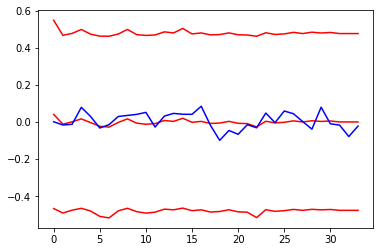

In [39]:
plt.plot(proj,c='r')
plt.plot(_[:,0],c='r')
plt.plot(_[:,1],c='r')
plt.plot(np.arange(0,34),endogtest,c='b')

In [165]:
x0=np.zeros(1+1+returnsant.drop('Hedge Fund',axis= 1).shape[1]+1)
ar._mse(x0,newendog,returnsant.drop('Hedge Fund',axis= 1)[0:160],1,1)

0.1013523072021148

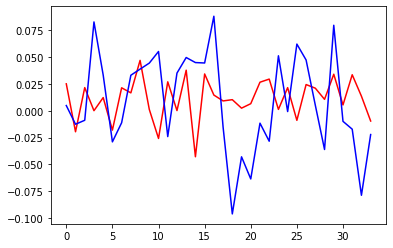

In [77]:
plt.plot(ar.fit_predict(returnsant['Hedge Fund'][160:194],returnsant.drop('Hedge Fund',axis=1)[160:194],'Nelder-mead',34),c='r')
plt.plot(np.arange(0,34),returnsant['Hedge Fund'][160:194],c='b')

In [ ]:
returnsant['Hedge Fund'][returnsant['Hedge Fund'].shape[0]-2: returnsant['Hedge Fund'].shape[0]]

In [ ]:

      
def loghood(parms,endog,exog,p,q):
    arparams,maparams,exogparams,bias = parms[0:p],parms[p:p+q],parms[p+q:p+q+exog.shape[1]],parms[p+q+exog.shape[1]:-1]
    
    armapredicts=np.zeros(endog.shape[0])
    bias=0
    res=abs(endog - np.mean(endog))
    if p==0:  
        for i in range(1,endog.shape[0]-q):
            armapredicts[i] = np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams) + exog.iloc[i,:].T.dot(exogparams) + bias
    if q==0:  
        for i in range(1,endog.shape[0]-p):
            armapredicts[i] =  np.array([ [endog[i-f+p]] for f in range(0,p)]).T.dot(arparams)  + exog.iloc[i,:].T.dot(exogparams) + bias
    else:
        for i in range(1,endog.shape[0]-2):
            
            armapredicts[i] =  np.array([ [endog[i-f+p]] for f in range(0,p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias 
    mse=(endog-armapredicts)**2
    summse=np.sum(mse)
    #liklihood=1/((2*np.pi*armapredicts)**(1/2))*np.exp(-res**2/(2*armapredicts**2))
  
    #log_hood=np.sum(-np.log(liklihood.squeeze()))
 
    return summse
def loghoodpredict(parms,endog,exog,p,q):
    arparams,maparams,exogparams,bias = parms[0:p],parms[p:p+q],parms[p+q:p+q+exog.shape[1]],parms[p+q+exog.shape[1]:-1]
    
    armapredicts=np.zeros(endog.shape[0])
    bias=0
    res=abs(endog - np.mean(endog))
    if p==0:  
        for i in range(1,endog.shape[0]-q):
            armapredicts[i] = np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams) + exog.iloc[i,:].T.dot(exogparams) + bias
    if q==0:  
        for i in range(1,endog.shape[0]-p):
            armapredicts[i] =  np.array([ [endog[i-f+p]] for f in range(0,p)]).T.dot(arparams)  + exog.iloc[i,:].T.dot(exogparams) + bias
    else:
        for i in range(1,endog.shape[0]-2):
            
            armapredicts[i] =  np.array([ [endog[i-f+p]] for f in range(0,p)]).T.dot(arparams.reshape(-1,1)) + np.array([[res[i-f+q]] for f in range(0,q)]).T.dot(maparams.reshape(-1,1)) + exog.iloc[i,:].T.dot(exogparams.reshape(-1,1)) + bias 
    mse=(endog-armapredicts)**2
    summse=np.sum(mse)
    #liklihood=1/((2*np.pi*armapredicts)**(1/2))*np.exp(-res**2/(2*armapredicts**2))
  
    #log_hood=np.sum(-np.log(liklihood.squeeze()))
 
    return armapredicts

In [ ]:
import matplotlib.pyplot as plt
plt.plot(loghoodpredict(np.array([ 0.13145366,  0.16091521, -0.0429173 ,  0.08853805, -0.22356078,
        0.02327908, -0.09303057, -0.0336204 , -0.03710137, -0.02853   ,
       -0.14864279, -0.0160258 , -0.043898  ,  0.08805484,  0.11858103,
        0.20677045,  0.33182327, -0.18666984,  0.1493662 ,  0.08164309,
       -0.2331048]),returnsant['Hedge Fund'],returnsant.drop('Hedge Fund',axis= 1),1,1))
plt.plot(returnsant['Hedge Fund'])

In [ ]:
x0=np.zeros(5+returnsant.shape[1]-1)
res = spop.minimize(loghood,x0,args=(returnsant['Hedge Fund'],returnsant.drop('Hedge Fund',axis= 1),1,1), method='Nelder-mead')
print(res)

In [ ]:
x0=np.array([np.ones(2),np.ones(2),np.ones(returnsant.shape[1]-1),1],dtype=object).tolist()
res = spop.minimize(loghood,x0,args=(returnsant['Hedge Fund'],returnsant.drop('Hedge Fund',axis= 1),2,2), method='Nelder-mead')
print(res)

In [ ]:
loghood([np.ones(2),np.ones(2),np.ones(returnsant.shape[1]-1),0],returnsant['Hedge Fund'],returnsant.drop('Hedge Fund',axis= 1),2,2)

In [ ]:
minimize(loghood,0,1, returnsant)